# Preprocessing Version 1 
## Author: Xiaochi (George) Li

Input: "data.xlsx" provided by the professor  
Output: "processed_data.pickle" with target variable "Salary" as the last column. And all the missing value should be imputed or dropped.

In [18]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [9]:
df = pd.read_excel("data.xlsx",thousands=",") #seperations in thousands

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 161542 to 346245
Data columns (total 26 columns):
Record Number                   80000 non-null object
MOU                             75347 non-null object
MOU Title                       75347 non-null object
Total Payments                  80000 non-null float64
Lump Sum Pay                    65157 non-null float64
Other Pay (Payroll Explorer)    80000 non-null float64
FMS Department                  80000 non-null int64
Job Class                       80000 non-null int64
Title                           80000 non-null object
Average Benefit Cost            80000 non-null float64
Time                            80000 non-null int64
Department                      80000 non-null object
p_dep                           64857 non-null float64
e_type                          80000 non-null object
Rate                            75347 non-null float64
POBP                            39056 non-null float64
p_bonus          

'Total payments, lump sum pay, other pay,POBP,p_bonus, t_bonus, o_pay, long,e_pay,Salary 需要转换成数字格式'

,Total Payments,Lump Sum Pay,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Benefit Cost,Time,p_dep,Rate,POBP,p_bonus,t_bonus,o_pay,long,e_pay,insurance,financial,Salary
Total Payments,1.000000,0.121466,0.490746,-0.068125,0.188545,0.514691,-0.214700,-0.297586,0.297436,0.688354,0.450440,0.210194,0.622713,0.271205,0.242351,0.508247,-0.068125,0.924470
Lump Sum Pay,0.121466,1.000000,0.649853,-0.006884,0.038827,0.083995,-0.003527,-0.032704,0.082893,0.269171,-0.007368,0.013353,-0.009153,0.000873,0.090662,0.082543,-0.006884,0.018424
Other Pay (Payroll Explorer),0.490746,0.649853,1.000000,0.038957,0.014036,0.302223,-0.098593,-0.158425,0.152657,0.667899,0.400633,0.286381,0.294527,0.265837,0.676787,0.295023,0.038957,0.278843
FMS Department,-0.068125,-0.006884,0.038957,1.000000,0.118853,0.136570,0.008870,0.908533,-0.030218,-0.027539,-0.152443,-0.069268,-0.052594,-0.041720,0.211744,0.124107,1.000000,-0.075626
Job Class,0.188545,0.038827,0.014036,0.118853,1.000000,0.213648,0.013364,0.046922,0.091833,0.027443,-0.087838,0.002026,0.017071,0.015865,0.049106,0.223391,0.118853,0.234484
Average Benefit Cost,0.514691,0.083995,0.302223,0.136570,0.213648,1.000000,0.118816,-0.389113,0.233131,0.388956,0.157735,0.016011,0.271283,0.106636,0.300622,0.999180,0.136570,0.484832
Time,-0.214700,-0.003527,-0.098593,0.008870,0.013364,0.118816,1.000000,-0.000651,0.047869,0.046064,-0.086213,-0.027383,-0.024090,-0.194657,-0.029940,0.124600,0.008870,-0.245398
p_dep,-0.297586,-0.032704,-0.158425,0.908533,0.046922,-0.389113,-0.000651,1.000000,-0.162397,-0.213308,-0.189000,-0.037421,-0.169540,-0.086745,-0.069380,-0.390740,0.908533,-0.278464
Rate,0.297436,0.082893,0.152657,-0.030218,0.091833,0.233131,0.047869,-0.162397,1.000000,0.113900,0.113270,0.058670,0.072759,0.055957,0.062678,0.231225,-0.030218,0.319955
POBP,0.688354,0.269171,0.667899,-0.027539,0.027443,0.388956,0.046064,-0.213308,0.113900,1.000000,0.462010,0.158576,0.898115,0.224899,0.415760,0.380789,-0.027539,0.342089


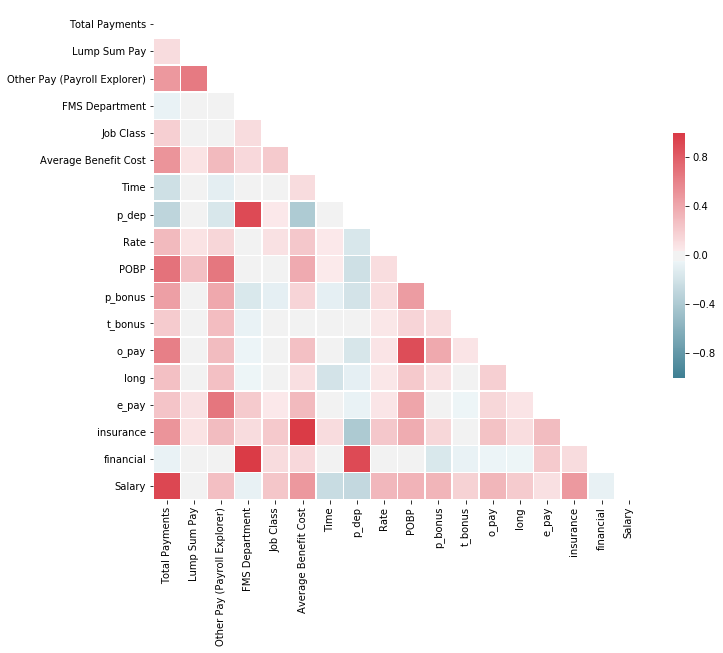

In [23]:
# Correlation
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr

In [24]:
# [todo]这里我列举了各个列的空缺情况，可以结合correlation做impute

null_rate = df.isnull().sum(axis = 0).sort_values(ascending = False)/float((len(df)))
null_rate

POBP                            0.511800
p_dep                           0.189287
p_grade                         0.189287
Lump Sum Pay                    0.185537
benefit                         0.178262
MOU                             0.058162
MOU Title                       0.058162
Rate                            0.058162
o_pay                           0.003750
Average Benefit Cost            0.000000
Total Payments                  0.000000
Other Pay (Payroll Explorer)    0.000000
FMS Department                  0.000000
Job Class                       0.000000
Title                           0.000000
Salary                          0.000000
Time                            0.000000
Department                      0.000000
financial                       0.000000
e_type                          0.000000
p_bonus                         0.000000
t_bonus                         0.000000
long                            0.000000
e_pay                           0.000000
insurance       

In [52]:
# Unique Analysis
unique_rate = df.apply(lambda x: len(pd.unique(x)),axis = 0).sort_values(ascending = False) #unique rate and sort
print(unique_rate)

def column_analyse(x,df = df): #print count for columns that only has few uniques
    print(df[x].value_counts(),"\n",df[x].value_counts().sum() ,"\n",df[x].value_counts()/len(df[x]), "\n-----------------------")

Total Payments                  76581
Salary                          57159
Other Pay (Payroll Explorer)    54940
Record Number                   54595
o_pay                           43159
POBP                            32256
e_pay                           26857
p_bonus                         21959
long                            12298
Lump Sum Pay                     9371
t_bonus                          8837
Rate                             7344
Title                            1523
Job Class                        1071
p_dep                             186
MOU Title                         183
MOU                               108
Department                         87
financial                          42
FMS Department                     42
p_grade                            29
insurance                          21
Average Benefit Cost               21
Time                                6
benefit                             5
e_type                              3
dtype: int64

In [67]:
column_analyse("e_type")
column_analyse("benefit")
column_analyse("Time")
column_analyse("p_grade")
#column_analyse("Department") #暂时不纳入考虑


FT    65739
PT    14020
PE      241
Name: e_type, dtype: int64 
 80000 
 FT    0.821738
PT    0.175250
PE    0.003012
Name: e_type, dtype: float64 
-----------------------
Grey      32331
Yellow    14945
Blue      13961
Red        4502
Name: benefit, dtype: int64 
 65739 
 Grey      0.404137
Yellow    0.186812
Blue      0.174512
Red       0.056275
Name: benefit, dtype: float64 
-----------------------
5    14437
4    13781
3    13495
2    12828
1    12733
6    12726
Name: Time, dtype: int64 
 80000 
 5    0.180462
4    0.172263
3    0.168687
2    0.160350
1    0.159163
6    0.159075
Name: Time, dtype: float64 
-----------------------
0    25709
2    16332
1     8606
3     7503
A     2513
C     1023
6      781
5      433
B      371
4      346
E      346
G      275
D      145
H      115
9      107
F       84
X       54
7       29
M       28
J       24
Y       22
N        3
S        2
8        2
L        1
T        1
Z        1
V        1
Name: p_grade, dtype: int64 
 64857 
 0    0.32136

In [79]:
categotical_features = ["e_type", "benefit", "Time", "p_grade"]
not_include_features = ["MOU", "MOU Title", "Title", "Department", "Record Number", "POBP"]
selected_features = [i for i in df.columns if i not in not_include_features]
X_selected = df.loc[:,selected_features]


count    64857.000000
mean      4594.945881
std       2524.309009
min        101.000000
25%       3001.000000
50%       4301.000000
75%       7033.000000
max       8702.000000
Name: p_dep, dtype: float64

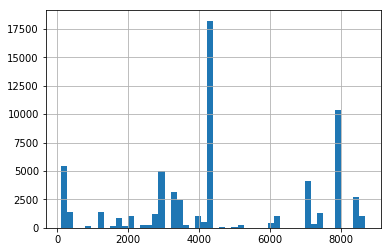

In [104]:
X_selected["p_dep"].hist(bins=50)
X_selected["p_dep"].describe()

count     65157.000000
mean        891.761663
std        5556.041196
min        -102.700000
25%           0.000000
50%           0.000000
75%           0.000000
max      182987.330000
Name: Lump Sum Pay, dtype: float64

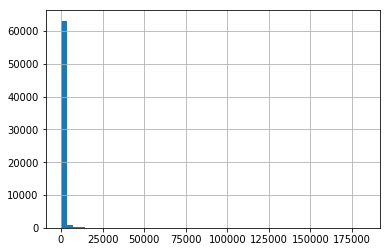

In [105]:
X_selected["Lump Sum Pay"].hist(bins=50)
X_selected["Lump Sum Pay"].describe()

count    75347.000000
mean        39.727032
std         34.198493
min          0.000000
25%         26.310000
50%         37.910000
75%         49.221250
max        900.000000
Name: Rate, dtype: float64

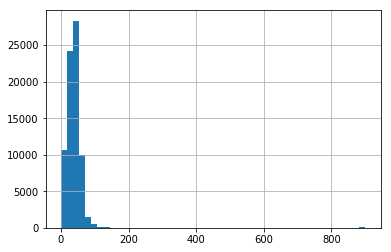

In [106]:
X_selected["Rate"].hist(bins=50)
X_selected["Rate"].describe()

count     79700.000000
mean       7768.492018
std       17179.146954
min        -650.860000
25%           0.000000
50%         464.920000
75%        7518.795000
max      307541.730000
Name: o_pay, dtype: float64

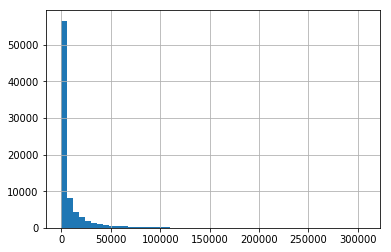

In [107]:
X_selected["o_pay"].hist(bins=50)
X_selected["o_pay"].describe()

In [137]:
# imputation
X_selected["p_dep"] = X_selected["p_dep"].fillna(X_selected["p_dep"].mean())
X_selected["Lump Sum Pay"] = X_selected["Lump Sum Pay"].fillna(0)
X_selected["Rate"] = X_selected["Rate"].fillna(X_selected["Rate"].mean())
X_selected["o_pay"] = X_selected["o_pay"].fillna(X_selected["o_pay"].median())
X_selected["p_grade"] = X_selected["p_grade"].fillna(-1)
X_selected["benefit"] = X_selected["benefit"].fillna(-1)
X_selected.head()

,Total Payments,Lump Sum Pay,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Benefit Cost,Time,p_dep,e_type,Rate,p_bonus,t_bonus,o_pay,long,e_pay,p_grade,insurance,benefit,financial,Salary
161542,4847.83,0.0,1740.73,98,941,18755.63,3,4594.945881,FT,31.29,0.00,0.0,0.00,0.00,1740.73,-1,17486.94,Yellow,98,3107.10
167941,56481.08,0.0,3480.12,14,1358,11435.16,3,1603.000000,FT,26.47,2869.48,0.0,1440.96,610.64,0.00,0,11012.40,Grey,14,51560.00
244088,138165.59,0.0,4609.98,98,3115,19392.62,5,4594.945881,FT,38.26,0.00,0.0,55497.61,0.00,4609.98,-1,18144.43,Yellow,98,78058.00
15392,111777.71,0.0,14526.10,70,2214,12740.52,1,4301.000000,FT,52.66,13293.10,1233.0,2621.55,0.00,0.00,3,11651.40,Blue,70,94630.06
69682,9961.87,0.0,565.20,88,2498,0.00,2,7903.000000,PT,14.79,0.00,304.0,0.00,261.20,0.00,A,0.00,-1,88,9396.67


In [168]:
# onehot encoding
X = pd.get_dummies(X_selected, columns=categotical_features)
column_name = [i for i in X.columns if i != "Salary"]+["Salary"]
X = X[column_name]


### Preprocessing summary

We throw away   
Need NLP: "MOU", "MOU Title", "Title", "Department",    
No meaning:"Record Number",  
\>50% missing: "POBP"

OneHot Encoding:  
"e_type", "benefit", "Time", "p_grade"

Imputed:  
p_dep: mean  
p_grade: add new category  
Lump Sum Pay:0  
benefit: add new category  
Rate:mean  
o_pay:median  

In [169]:
X.to_pickle("processed_data.pickle")